In [1]:
# Import dependencies
import math
import operator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

   year           gdp
0  2001  3.268520e+10
1  2002  3.506411e+10
2  2003  3.955251e+10
3  2004  4.542785e+10
4  2005  5.763326e+10


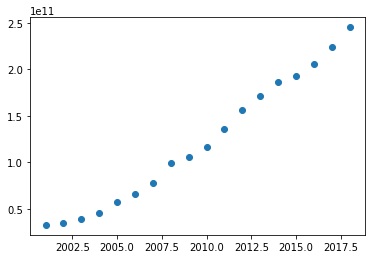

In [6]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/gdp.csv'
data = pd.read_csv(path)

# Check and print out data
print(data.head())
plt.scatter(data.year, data.gdp)
plt.show()

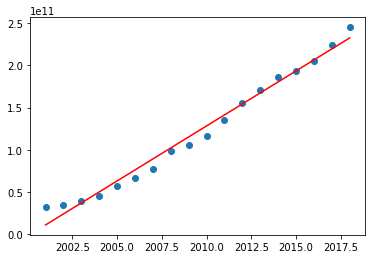

Root mean squared error score: 0.8807610418229687
R^2 score: 0.9833091865603482


In [7]:
# Linear Regression
x = data.year[:, np.newaxis]
y = data.gdp[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
plt.show()

# Check scores
rmse = math.sqrt(mse(y, y_pred))
print("Root mean squared error score: " + str(rmse / 10**10))
r2 = r2_score(y, y_pred)
print("R^2 score: " + str(r2))

Root mean squared error score: 0.36775934937350024
R^2 score: 0.9970900283719196


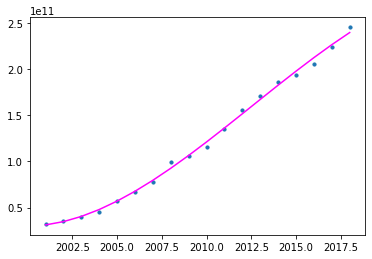

In [8]:
# Polynomial Regression
polynomial_features = PolynomialFeatures(degree = 4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = math.sqrt(mse(y,y_poly_pred))
print("Root mean squared error score: " + str(rmse / 10**10))
r2 = r2_score(y,y_poly_pred)
print("R^2 score: " + str(r2))


plt.scatter(x, y, s=10)

# Sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='magenta')
plt.show()

In [9]:
# MAPE 
y, y_pred = np.array(y), np.array(y_pred)
print(np.mean(np.abs((y - y_pred) / y)) * 100)

10.813277218420414
